In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

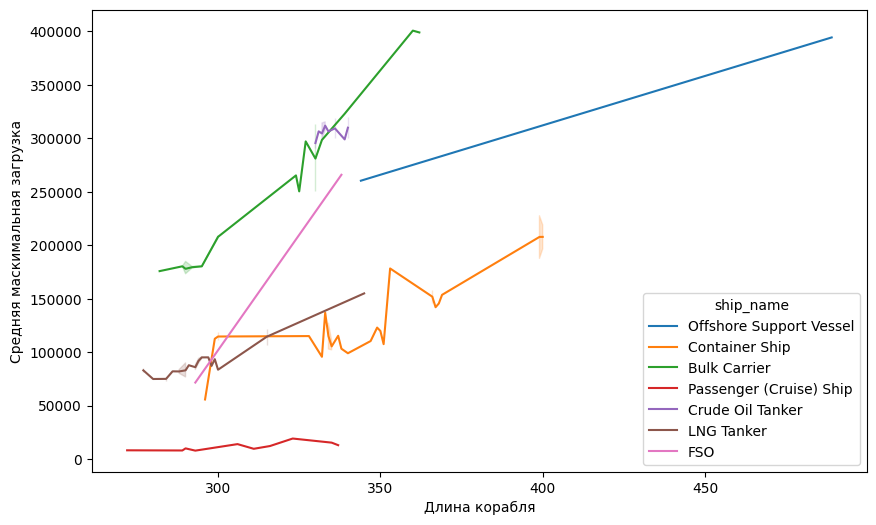

In [65]:
file = pd.read_csv("Cleaned_ships_data.csv")
plt.figure(figsize=(10,6))
plt.xlabel("Длина корабля")
plt.ylabel("Средняя маскимальная загрузка")
sb.lineplot(x="length", y="dwt", hue = "ship_name", data=file)
plt.show()

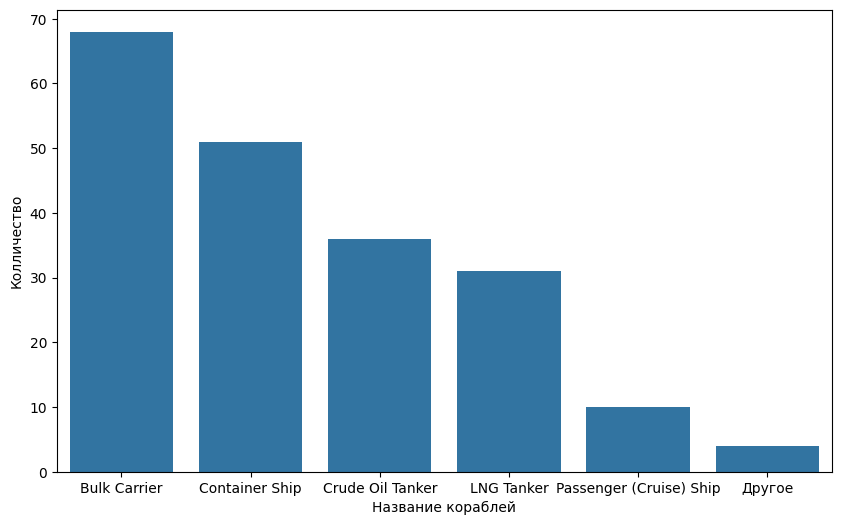

In [66]:
counts=file["ship_name"].value_counts()
min_amount = 10
df = file["ship_name"].apply(lambda x: "Другое" if counts[x] < min_amount else x).value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.xlabel("Название кораблей")
plt.ylabel("Колличество")
sb.barplot(x="ship_name", y="count", data=df)
plt.show()


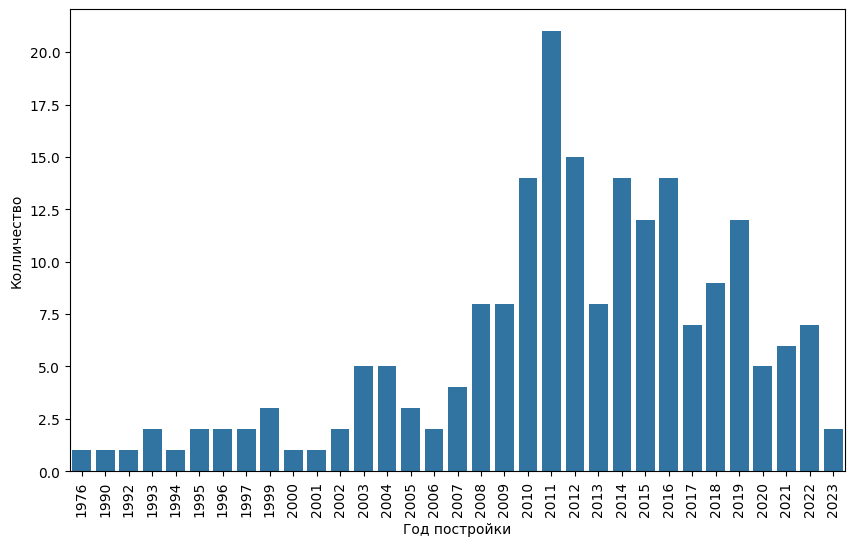

In [67]:
df = file["built_year"].value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
plt.xlabel("Год постройки")
plt.ylabel("Колличество")
sb.barplot(x="built_year", y="count", data=df)
plt.show()

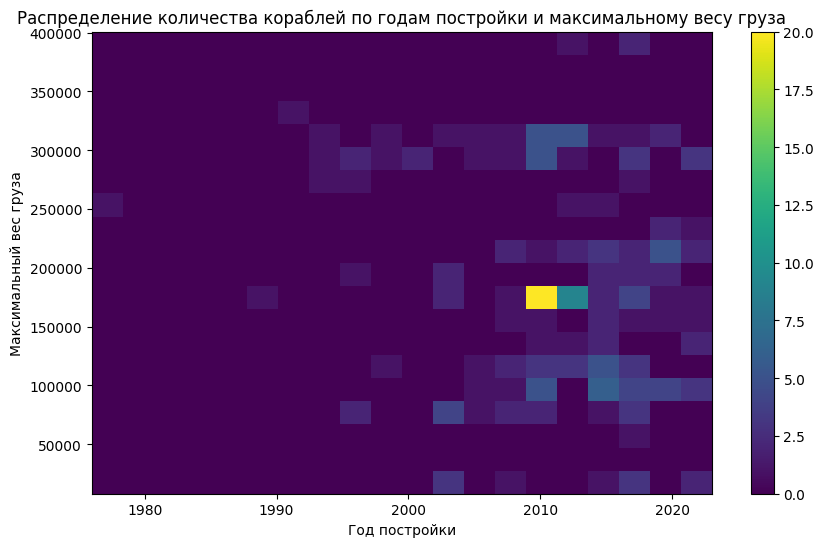

In [68]:
df = file[["built_year",  "dwt"]]
plt.figure(figsize=(10,6))
plt.xlabel("Год постройки")
plt.ylabel("Максимальный вес груза")
plt.title("Распределение количества кораблей по годам постройки и максимальному весу груза")
plt.hist2d(df["built_year"], df["dwt"], bins=20)
plt.colorbar()
plt.show()

<Figure size 1000x600 with 0 Axes>

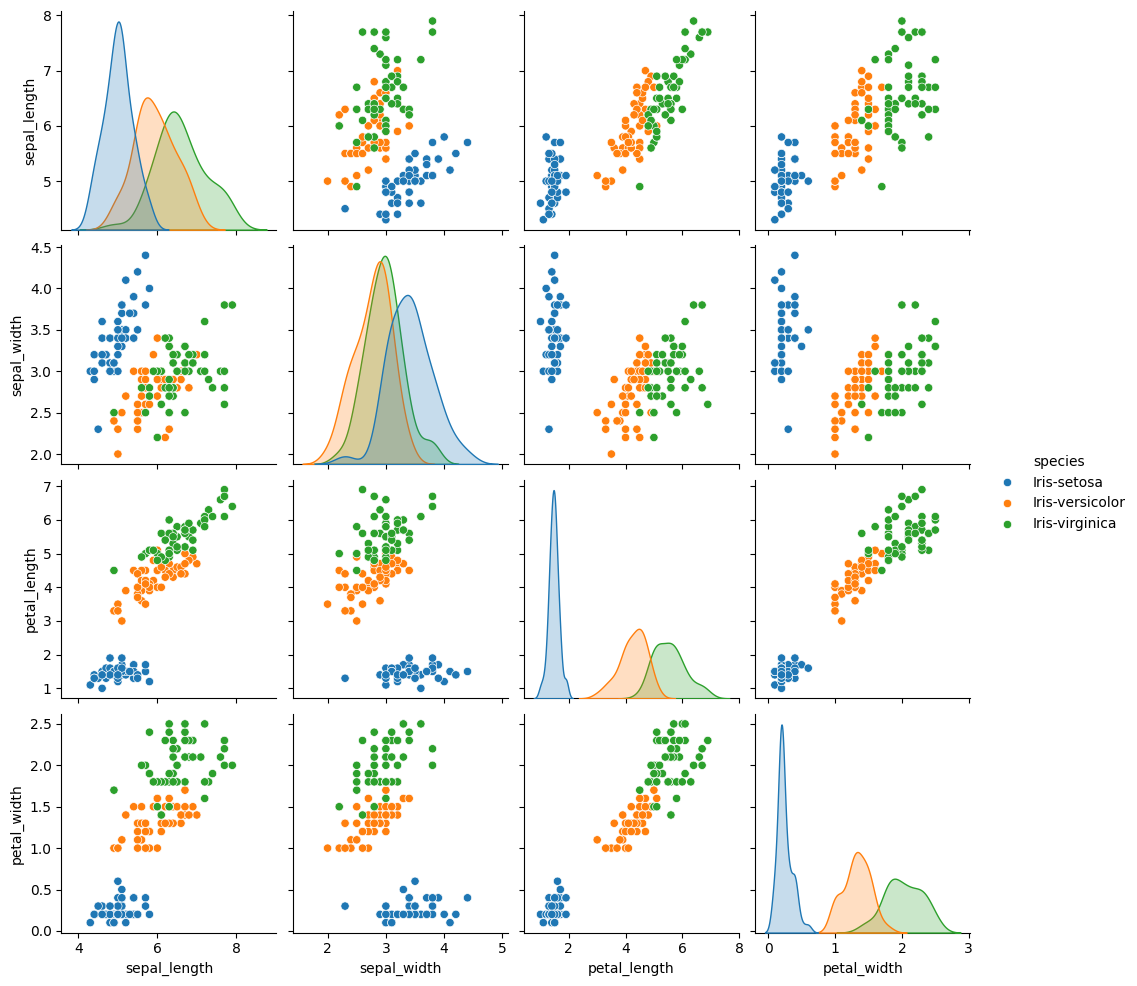

In [69]:
file2 = pd.read_csv("IRIS.csv")
plt.figure(figsize=(10,6))
sb.pairplot(file2, hue="species")

<Axes: xlabel='Виды растений', ylabel='Длина чашелистика'>

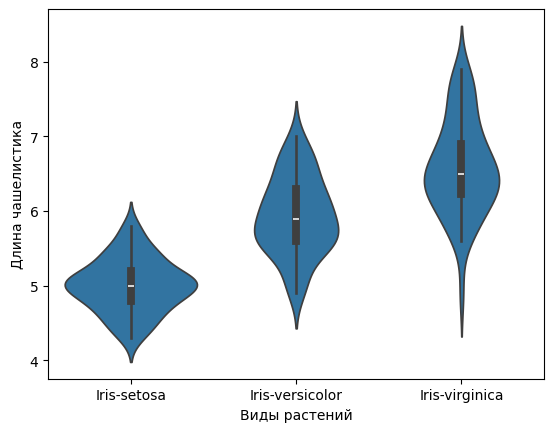

In [70]:
plt.ylabel("Длина чашелистика")
plt.xlabel("Виды растений")
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[0])

<Axes: xlabel='Виды растений', ylabel='Ширина чашелистика'>

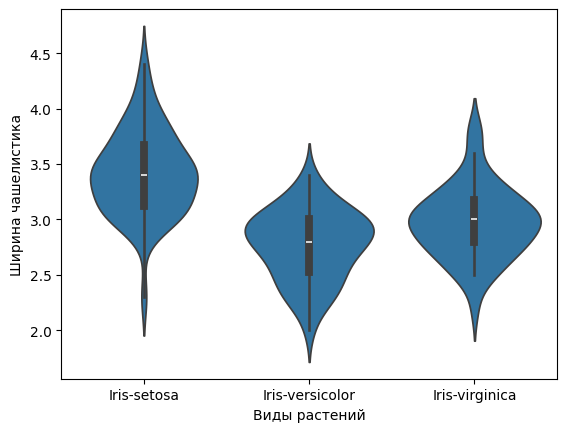

In [71]:
plt.ylabel("Ширина чашелистика")
plt.xlabel("Виды растений")
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[1])

<Axes: xlabel='Виды растений', ylabel='Длина лепестка'>

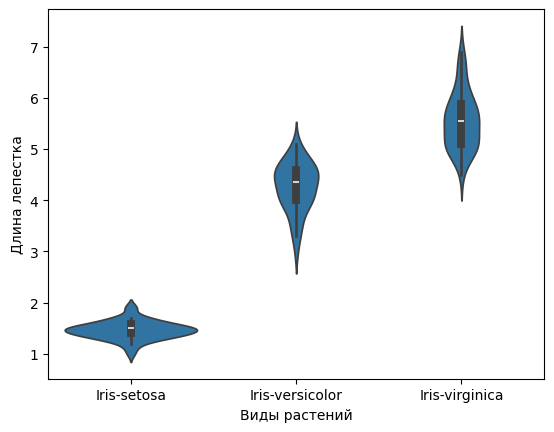

In [72]:
plt.ylabel("Длина лепестка")
plt.xlabel("Виды растений")
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[2])

<Axes: xlabel='Виды растений', ylabel='Ширина лепестка'>

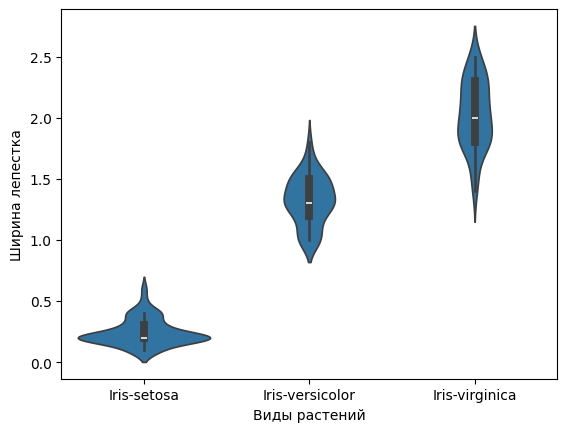

In [73]:
plt.ylabel("Ширина лепестка")
plt.xlabel("Виды растений")
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[3])

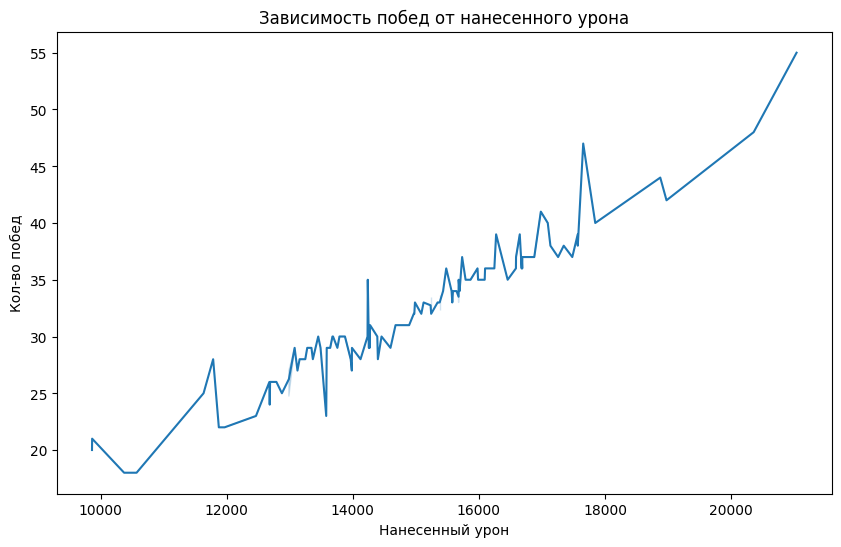

In [74]:
file3 = pd.read_csv("Pubg_Stats.csv")
plt.figure(figsize=(10,6))
plt.title("Зависимость побед от нанесенного урона")
plt.xlabel("Нанесенный урон")
plt.ylabel("Кол-во побед")
sb.lineplot(data = file3, x = "Damage_Dealt", y = "Wins")
plt.show()

Исходя из этого графика, можно сделать вывод, что чем больше урона нанесет игрок тем выше шанс победить в игре.

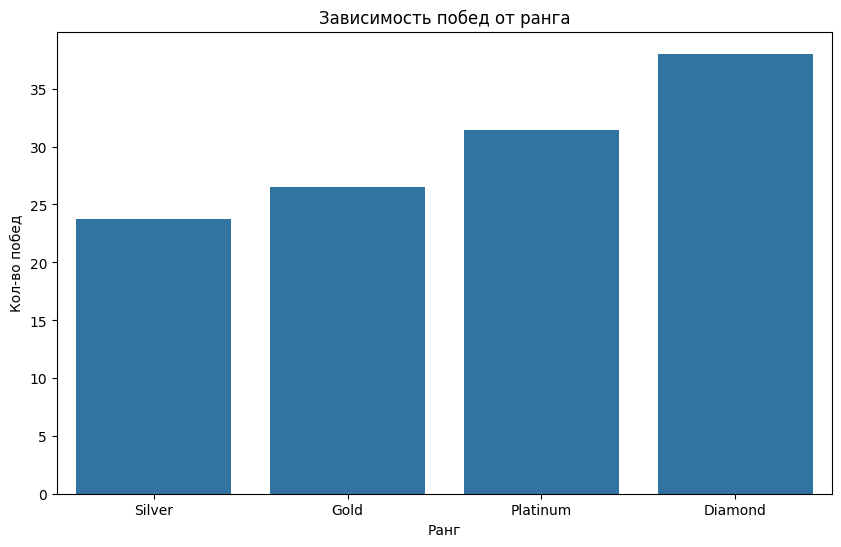

In [75]:
plt.figure(figsize=(10,6))
plt.title("Зависимость побед от ранга")
plt.xlabel("Ранг")
plt.ylabel("Кол-во побед")
sb.barplot(data = file3, x = "Rank", y = "Wins", order=['Silver', 'Gold', 'Platinum', 'Diamond'], errorbar=None)
plt.show()

Кол-во побед напрямую зависит от ранга, соответсвенно от скилла(в целом очевидно, но надо было проверить)

<Figure size 1000x600 with 0 Axes>

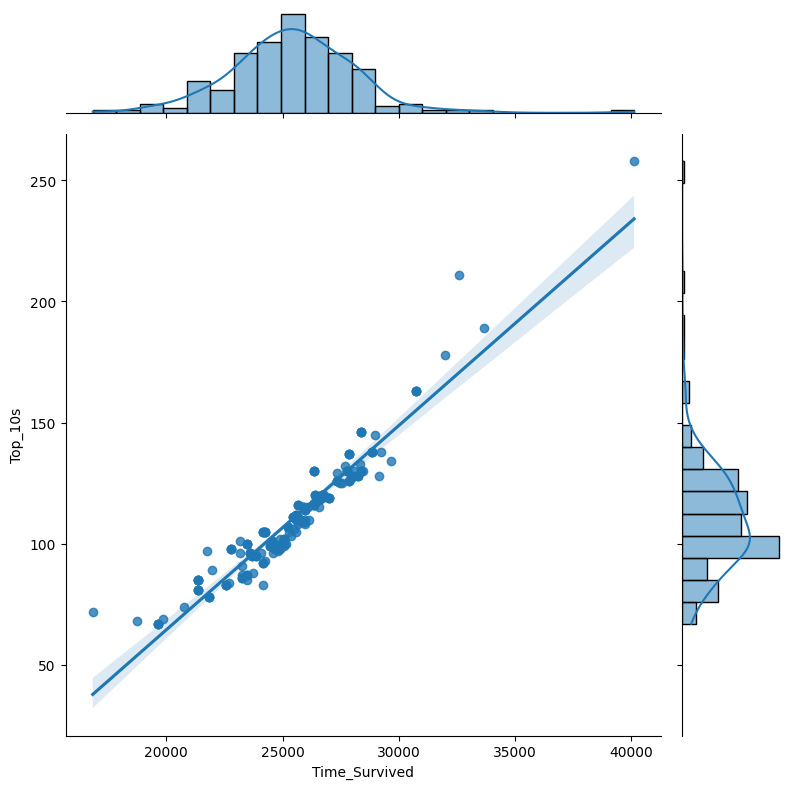

In [76]:
plt.figure(figsize=(10,6))
sb.jointplot(x="Time_Survived", y="Top_10s", data=file3, kind="reg", height=8)
plt.show()

Здесь можно заметить, что в начале пути, игроки занимают топ-10 чаще чем те, кто уже отыграл какое то время, но потом тенденция роста - чем больше времени выжил, тем чаще занимал топ-10.